<a href="https://colab.research.google.com/github/AntonioHallgass/corso_AI_2025/blob/main/PROVA_PRATICA_1977520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Pratica - Metodi AI per la fisica e Applicazioni Fisiche al ML
### 30.6.2026 - AA 2024/25 - Docenti: S. Giagu e A. Ciardiello

---

**Regole:**

*   **tempo a disposizione:** 3.0h

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano. L'esecuzione della cella scarica contesualmente il dataset da utilizzare durante la prova;
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito*.
*   una volta completato il compito scaricare il notebook in formato *.ipynb* e caricarlo usando il form:
[consegna notebook](https://docs.google.com/forms/d/e/1FAIpQLSekkv2tTVIIAyY15lc3a4px_yjxoQJ6INr6CuWiXNw1GccJoQ/viewform?usp=dialog)<p>


**NOTA 1:** per scaricare localmente il notebook da colab: menù **File->Dowload->Download .ipynb** (non è necessario cambiare il nome del file, il form associa automaticamnte il vostro nome / email al file che caricate)
<p>

**NOTA 2:** una volta caricato e sottomesso il notebook non sono più possibili ulteriori modifiche.

In [254]:
#@ Dati Personali
import os

Nome = 'Antonio'  #@param {type: "string"}
Cognome = 'Hallgass' #@param {type: "string"}
NumeroMatricola = 1977520 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Download datasets ...')
  !wget http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
  !ls
  print('Done')

Download datasets ...
--2025-06-30 15:12:26--  http://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.50.104, 137.138.55.232, 188.185.5.88, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.50.104|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/gml_images.npz [following]
--2025-06-30 15:12:26--  https://giagu.web.cern.ch/giagu/CERN/gml_images.npz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.50.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304133499 (290M)
Saving to: ‘gml_images.npz.4’

gml_images.npz.4    100%[===================>] 290.04M  20.6MB/s    in 18s     

2025-06-30 15:12:45 (15.9 MB/s) - ‘gml_images.npz.4’ saved [304133499/304133499]

best_model.pth	gml_images.npz.1  gml_images.npz.3  sample_data
gml_images.npz	gml_images.npz.2  gml_images.npz.4
Done


# Descrizione del compito:

Viene fornito un dataset in formato numpy compresso *gml_images.npz*, che contiene due array numpy:

*   images: 20000 esempi di immagini di shape $(64,64)$;
*   targets: 20000 target associati $y\in R^1$.


---

**Svolgere i seguenti quesiti:**

1. (Q0): leggere i due array e graficare 5 immagini con i target associati, formattati in una matrice di 3x3 plot
2. (Q1): **allenare** un modello basato su architettura CNN che predica il target associato a ciascuna immagine, e stimarne le prestazioni nel modo che si ritiene più opporuno;
3. (Q2): **allenare** la stessa architettura usata in Q1, modificata in modo da avere tutte le **attivazioni di tipo lineare**;
4. (Q3): **allenare** la stessa architettura usata in Q1, (**utilizzando lo stesso numero di epoche utilizzate nel punto Q1**), modificata in modo da avere tutte le **attivazioni di tipo sigmoide**;
5. (Q4): **allenare** la stessa architettura usata in Q1, ma inizializzando tutti i **pesi e i bias della rete ad un valore iniziale nullo (eg $=0.0$)**;
5. (Q5): spiegare le differenze incontrate nelle quattro configurazioni Q1, Q2, Q3 e Q4.

* commentare opportunamente i risultati ottenuti in ogni punto.

**Consigli**:

  1) R2 di Q1 va bene 0.7 (Non concentratevi a ottenere performance perfette)

  2)Commentare la presenza/assenza di overfitting nelle diverse configurazini

  3)Commentare la differenza di tempo necessario ad addestrare nelle diverse configurazioni

  4) Per confrontare le diverse configurazioni tenete gli iperparametri fissati

In [255]:
# Questa funzione inizializza a zero tutti i pesi di layer lineari e conv2D
#def zero_weights(model):
#    for module in model.modules():
#        if isinstance(module, (nn.Linear, nn.Conv2d)):
#            if module.weight is not None:
#                nn.init.constant_(module.weight, 0.0)
#            if module.bias is not None:
#                nn.init.constant_(module.bias, 0.0)

# **(Q0): LEGGERE E GRAFICARE**

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchsummary import summary
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

In [257]:
dati = np.load('gml_images.npz')
X = dati['images']
y=dati['targets']
X=X/(np.max(X))
print(X.shape)
print(y.shape)
print(np.max(X))

(20000, 64, 64)
(20000,)
1.0


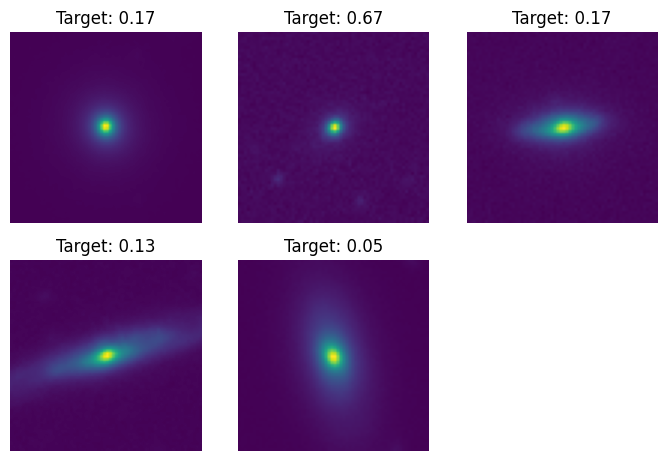

In [258]:
indices = np.random.choice(len(X), 5, replace=False)

fig = plt.figure(figsize=(7,7))
for i, idx in enumerate(indices):
    ax=fig.add_subplot(3, 3, i + 1)
    ax.imshow(X[idx])
    ax.set_title(f'Target: {y[idx]:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [259]:
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size


X_tensor = torch.from_numpy(X).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print(f'Dimensioni del training set: {len(train_dataset)}')
print(f'Dimensioni del validation set: {len(val_dataset)}')
print(f'Dimensioni del test set: {len(test_dataset)}')
print(f'Numero di batch nel training loader: {len(train_loader)}')
print(f'Numero di batch nel validation loader: {len(val_loader)}')
print(f'Numero di batch nel test loader: {len(test_loader)}')

Dimensioni del training set: 14000
Dimensioni del validation set: 3000
Dimensioni del test set: 3000
Numero di batch nel training loader: 438
Numero di batch nel validation loader: 94
Numero di batch nel test loader: 94


# **(Q1): MODELLO CNN**

### RETE

In [260]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

### TRAIN

Epoch [1/30], Train Loss: 0.1828, Val Loss: 0.1356
Epoch [2/30], Train Loss: 0.1473, Val Loss: 0.1261
Epoch [3/30], Train Loss: 0.1330, Val Loss: 0.1205
Epoch [4/30], Train Loss: 0.1269, Val Loss: 0.1176
Epoch [5/30], Train Loss: 0.1225, Val Loss: 0.1166
Epoch [6/30], Train Loss: 0.1171, Val Loss: 0.1066
Epoch [7/30], Train Loss: 0.1129, Val Loss: 0.1033
Epoch [8/30], Train Loss: 0.1077, Val Loss: 0.0994
Epoch [9/30], Train Loss: 0.1069, Val Loss: 0.1007
Epoch [10/30], Train Loss: 0.1042, Val Loss: 0.0984
Epoch [11/30], Train Loss: 0.1026, Val Loss: 0.0970
Epoch [12/30], Train Loss: 0.0994, Val Loss: 0.0967
Epoch [13/30], Train Loss: 0.0990, Val Loss: 0.0997
Epoch [14/30], Train Loss: 0.0955, Val Loss: 0.0912
Epoch [15/30], Train Loss: 0.0962, Val Loss: 0.0940
Epoch [16/30], Train Loss: 0.0953, Val Loss: 0.0927
Epoch [17/30], Train Loss: 0.0935, Val Loss: 0.0915
Early stopping after 3 epochs without improvement.


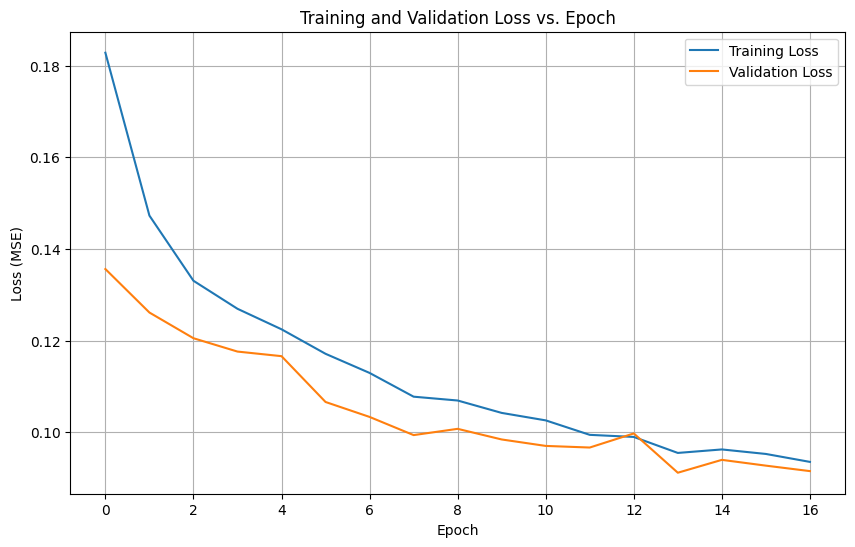

In [261]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

num_epochs = 30
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(best_model_wts, 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

model.load_state_dict(best_model_wts)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

### ANALISI

R-squared sul test set: 0.6982
Mean Squared Error sul test set: 0.0956
Root Mean Squared Error sul test set: 0.3092


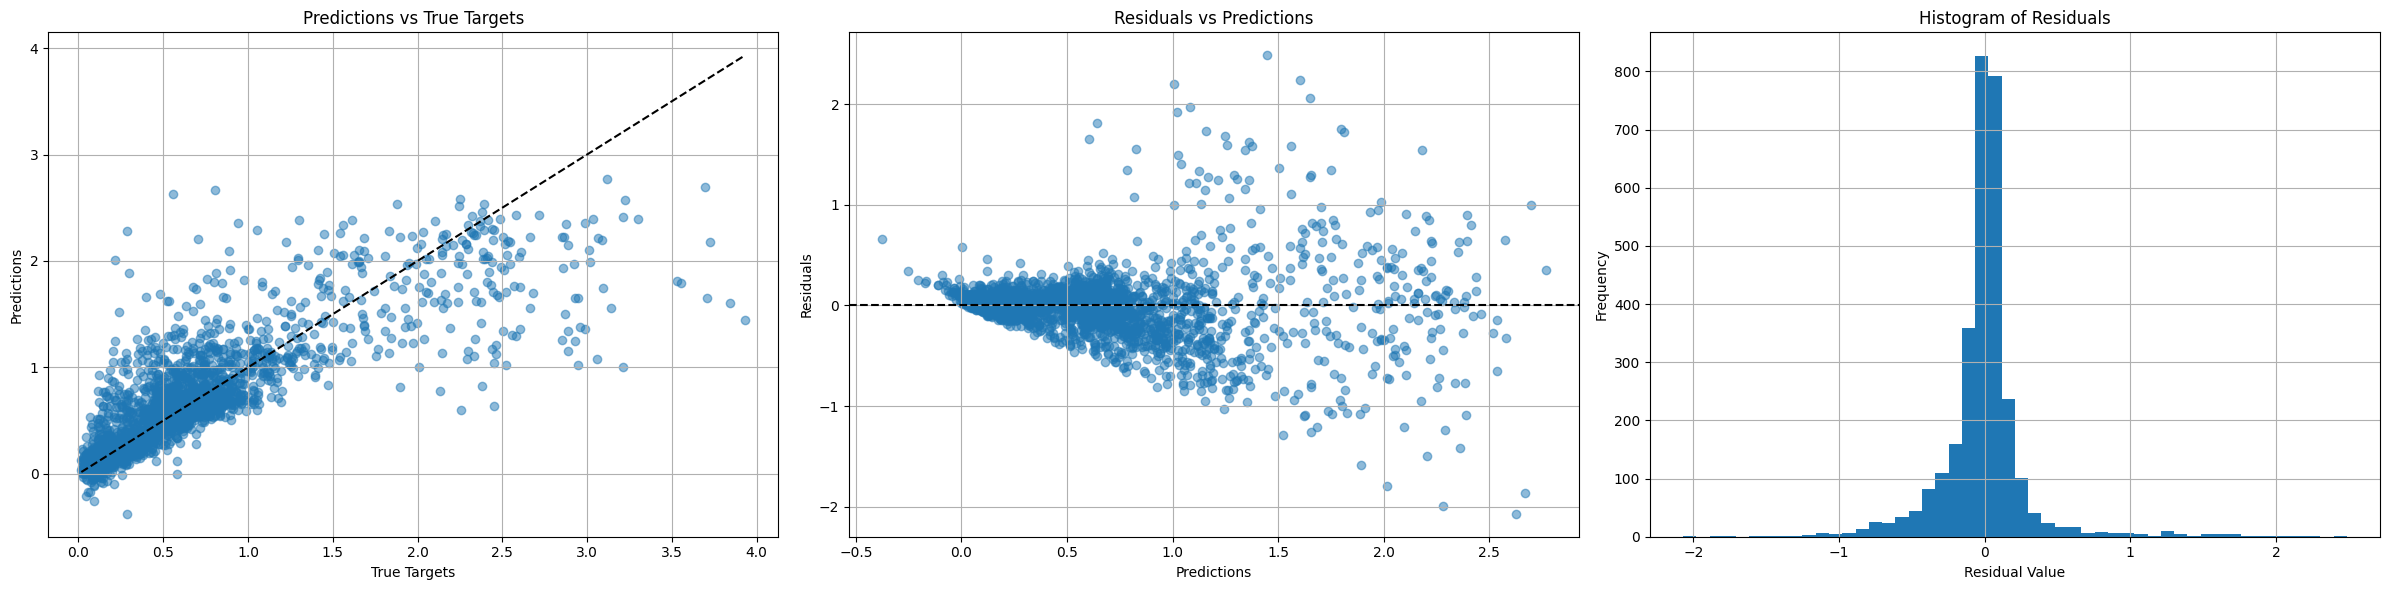

In [262]:
model.eval()
test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().tolist())
        test_targets.extend(targets.squeeze().tolist())

test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

r2 = r2_score(test_targets, test_predictions)
print(f'R-squared sul test set: {r2:.4f}')
mse = mean_squared_error(test_targets, test_predictions)
print(f'Mean Squared Error sul test set: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error sul test set: {rmse:.4f}')
residuals = test_targets - test_predictions

fig = plt.figure(figsize=(24, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_targets, test_predictions, alpha=0.5)
ax1.plot([min(test_targets), max(test_targets)],
         [min(test_targets), max(test_targets)], 'k--')
ax1.set_xlabel('True Targets')
ax1.set_ylabel('Predictions')
ax1.set_title('Predictions vs True Targets')
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(test_predictions, residuals, alpha=0.5)
ax2.axhline(0, color='k', linestyle='--')
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predictions')
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(residuals, bins=50)
ax3.set_xlabel('Residual Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Residuals')
ax3.grid(True)

plt.tight_layout() ; plt.show()

# **(Q2): ATTIVAZIONI DI TIPO LINEARE**

### RETE

In [263]:
import torch
import torch.nn as nn

class CNN_linear(nn.Module):
    def __init__(self):
        super(CNN_linear, self).__init__()

        self.conv1    = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1      = nn.BatchNorm2d(32)
        self.act1     = nn.Identity()
        self.pool1    = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2    = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2      = nn.BatchNorm2d(64)
        self.act2     = nn.Identity()
        self.pool2    = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten  = nn.Flatten()
        self.fc1      = nn.Linear(64 * 16 * 16, 128)
        self.act3     = nn.Identity()
        self.fc2      = nn.Linear(128, 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.act3(self.fc1(x))
        x = self.fc2(x)
        return x


### TRAIN

Epoch [1/30], Train Loss: 0.5968, Val Loss: 0.3717
Epoch [2/30], Train Loss: 0.4454, Val Loss: 0.2944
Epoch [3/30], Train Loss: 0.3062, Val Loss: 0.2781
Epoch [4/30], Train Loss: 0.2540, Val Loss: 0.2183
Epoch [5/30], Train Loss: 0.2443, Val Loss: 0.3023
Epoch [6/30], Train Loss: 0.2267, Val Loss: 0.2302
Epoch [7/30], Train Loss: 0.2209, Val Loss: 0.2089
Epoch [8/30], Train Loss: 0.2100, Val Loss: 0.2354
Epoch [9/30], Train Loss: 0.2093, Val Loss: 0.2096
Epoch [10/30], Train Loss: 0.2044, Val Loss: 0.2008
Epoch [11/30], Train Loss: 0.2067, Val Loss: 0.2039
Epoch [12/30], Train Loss: 0.2080, Val Loss: 0.2068
Epoch [13/30], Train Loss: 0.1965, Val Loss: 0.1939
Epoch [14/30], Train Loss: 0.2025, Val Loss: 0.1892
Epoch [15/30], Train Loss: 0.1926, Val Loss: 0.2209
Epoch [16/30], Train Loss: 0.1946, Val Loss: 0.2069
Epoch [17/30], Train Loss: 0.1923, Val Loss: 0.1886
Epoch [18/30], Train Loss: 0.1972, Val Loss: 0.2107
Epoch [19/30], Train Loss: 0.1874, Val Loss: 0.2032
Epoch [20/30], Train 

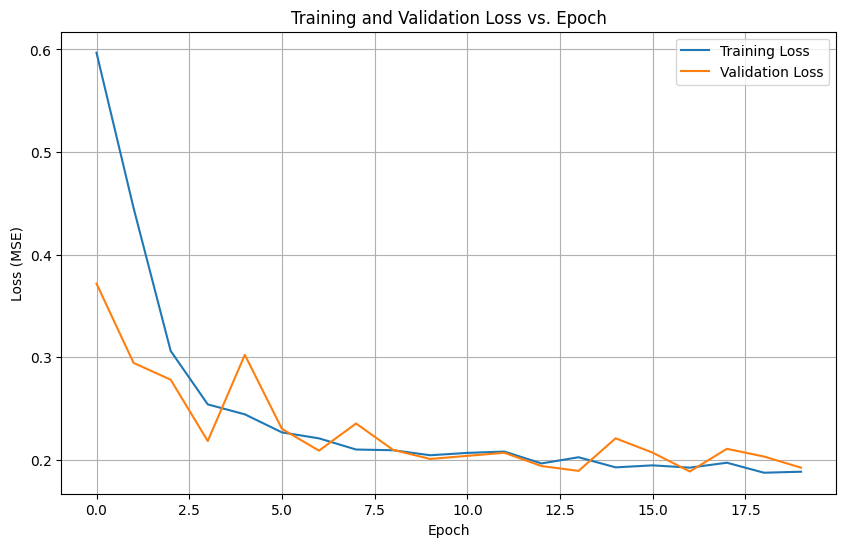

In [264]:
model = CNN_linear().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

num_epochs = 30
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(best_model_wts, 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

model.load_state_dict(best_model_wts)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

### ANALISI

R-squared sul test set: 0.3970
Mean Squared Error sul test set: 0.1911
Root Mean Squared Error sul test set: 0.4371


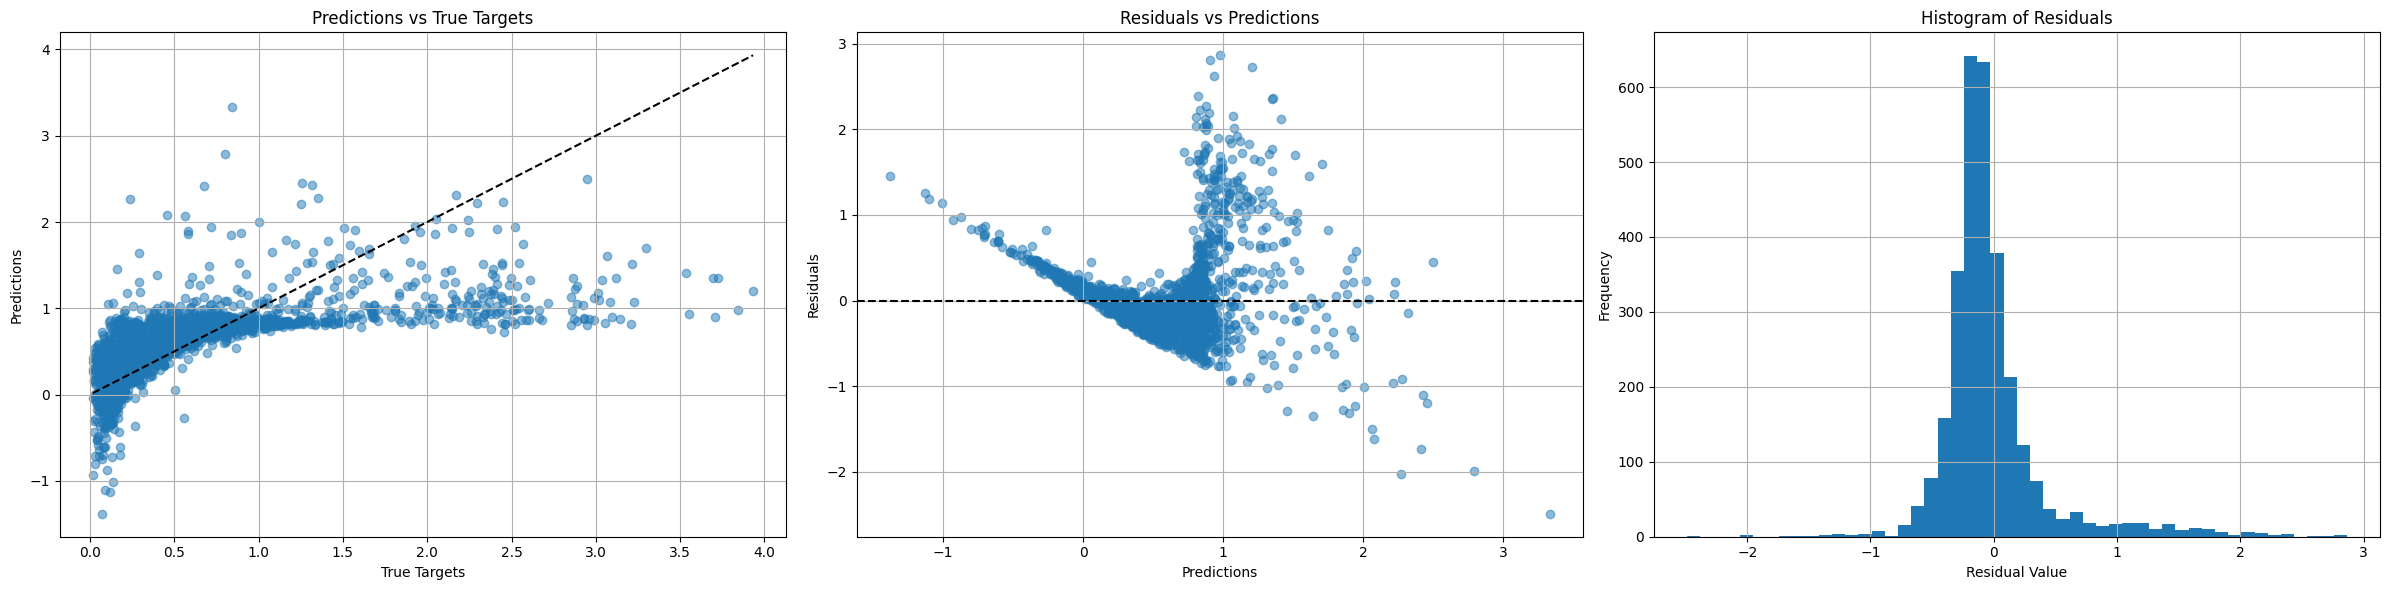

In [265]:
model.eval()
test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().tolist())
        test_targets.extend(targets.squeeze().tolist())

test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

r2 = r2_score(test_targets, test_predictions)
print(f'R-squared sul test set: {r2:.4f}')
mse = mean_squared_error(test_targets, test_predictions)
print(f'Mean Squared Error sul test set: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error sul test set: {rmse:.4f}')
residuals = test_targets - test_predictions

fig = plt.figure(figsize=(24, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_targets, test_predictions, alpha=0.5)
ax1.plot([min(test_targets), max(test_targets)],
         [min(test_targets), max(test_targets)], 'k--')
ax1.set_xlabel('True Targets')
ax1.set_ylabel('Predictions')
ax1.set_title('Predictions vs True Targets')
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(test_predictions, residuals, alpha=0.5)
ax2.axhline(0, color='k', linestyle='--')
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predictions')
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(residuals, bins=50)
ax3.set_xlabel('Residual Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Residuals')
ax3.grid(True)

plt.tight_layout() ; plt.show()

# **(Q3): ATTIVAZIONI DI TIPO SIGMOIDE**

### RETE

In [266]:
import torch
import torch.nn as nn

class CNN_sigmoid(nn.Module):
    def __init__(self):
        super(CNN_sigmoid, self).__init__()

        self.conv1    = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1      = nn.BatchNorm2d(32)
        self.sigmoid1 = nn.Sigmoid()
        self.pool1    = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2    = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2      = nn.BatchNorm2d(64)
        self.sigmoid2 = nn.Sigmoid()
        self.pool2    = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten  = nn.Flatten()
        self.fc1      = nn.Linear(64 * 16 * 16, 128)
        self.sigmoid3 = nn.Sigmoid()
        self.fc2      = nn.Linear(128, 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.sigmoid1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.sigmoid2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.sigmoid3(self.fc1(x))
        x = self.fc2(x)
        return x

### TRAIN

In [ ]:
model = CNN_sigmoid().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

num_epochs = 30
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(best_model_wts, 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

model.load_state_dict(best_model_wts)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

Epoch [1/30], Train Loss: 0.2226, Val Loss: 0.1960
Epoch [2/30], Train Loss: 0.1885, Val Loss: 0.1688
Epoch [3/30], Train Loss: 0.1724, Val Loss: 0.1549
Epoch [4/30], Train Loss: 0.1603, Val Loss: 0.1471


### ANALISI

In [ ]:
model.eval()
test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().tolist())
        test_targets.extend(targets.squeeze().tolist())

test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

r2 = r2_score(test_targets, test_predictions)
print(f'R-squared sul test set: {r2:.4f}')
mse = mean_squared_error(test_targets, test_predictions)
print(f'Mean Squared Error sul test set: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error sul test set: {rmse:.4f}')
residuals = test_targets - test_predictions

fig = plt.figure(figsize=(24, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_targets, test_predictions, alpha=0.5)
ax1.plot([min(test_targets), max(test_targets)],
         [min(test_targets), max(test_targets)], 'k--')
ax1.set_xlabel('True Targets')
ax1.set_ylabel('Predictions')
ax1.set_title('Predictions vs True Targets')
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(test_predictions, residuals, alpha=0.5)
ax2.axhline(0, color='k', linestyle='--')
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predictions')
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(residuals, bins=50)
ax3.set_xlabel('Residual Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Residuals')
ax3.grid(True)

plt.tight_layout() ; plt.show()

# **(Q4): PESI INIZIALIZZATI A 0**

### INIZIALIZZAZIONE

In [ ]:
def zero_weights(model):
    for module in model.modules():
        if isinstance(module, (nn.Linear, nn.Conv2d)):
            if module.weight is not None:
                nn.init.constant_(module.weight, 0.0)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0.0)

def get_max_lin_conv_weights(model):
    max_val = 0.0
    for module in model.modules():
        if isinstance(module, (nn.Conv2d, nn.Linear)) and module.weight is not None:
            current = module.weight.data.abs().max().item()
            max_val = max(max_val, current)
    return max_val

In [ ]:
model = CNN().to(device)

print("Max Conv/Linear weight prima:", get_max_lin_conv_weights(model))
zero_weights(model)
print("Max Conv/Linear weight dopo:", get_max_lin_conv_weights(model))

In [ ]:
print("Max Conv/Linear weight prima:", get_max_lin_conv_weights(model))
zero_weights(model)
print("Max Conv/Linear weight dopo:", get_max_lin_conv_weights(model))

### TRAIN

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

num_epochs = 30
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 3

train_losses = []
val_losses = []

best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_without_improvement = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(best_model_wts, 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after {patience} epochs without improvement.')
            break

model.load_state_dict(best_model_wts)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

### ANALISI

In [ ]:
model.eval()
test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().tolist())
        test_targets.extend(targets.squeeze().tolist())

test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

r2 = r2_score(test_targets, test_predictions)
print(f'R-squared sul test set: {r2:.4f}')
mse = mean_squared_error(test_targets, test_predictions)
print(f'Mean Squared Error sul test set: {mse:.4f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error sul test set: {rmse:.4f}')
residuals = test_targets - test_predictions

fig = plt.figure(figsize=(24, 6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_targets, test_predictions, alpha=0.5)
ax1.plot([min(test_targets), max(test_targets)],
         [min(test_targets), max(test_targets)], 'k--')
ax1.set_xlabel('True Targets')
ax1.set_ylabel('Predictions')
ax1.set_title('Predictions vs True Targets')
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(test_predictions, residuals, alpha=0.5)
ax2.axhline(0, color='k', linestyle='--')
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predictions')
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(residuals, bins=50)
ax3.set_xlabel('Residual Value')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Residuals')
ax3.grid(True)

plt.tight_layout() ; plt.show()

# (Q5): DIFFERENZE TRA LE RETI.

Tutte e quattro le reti sono state confrontate utuilizzando gli stessi iperparametri.

* **CNN ReLU**:
R² ≈ 0.68
Presenta residui piccoli senza struttura evidente.  L’istogramma mostra una distribuzione grossomodo simmetrica centrata su 0, con media circa nulla e code relativamente bilanciate. Questo suggerisce che il modello ha catturato bene la relazione globale.

Il modello è il migliore perché ReLU non satura, mantiene gradienti vivi ed esprime bene le non-linearità
* **CNN Lineare**:
R² ≈ 0.38
Qui si possono notare pattern nei residui, sintomo di underfitting dovuto alla natura lineare del modello.
I residui della CNN lineare non appaiono distribuiti casualmente. Questo comportamento non casuale conferma che la rete lineare non è riuscita a modellare perfettamente la curva reale, lasciando strutture prevedibili negli errori.

Il modello è troppo rigido: senza attivazioni non può rappresentare funzioni non lineari e causa underfitting
* **CNN Sigmoide**:
R² ≈ 0.61
I residui rivelano un andamento sistematico dovuto alla saturazione dell’output. In particolare, per i casi con target alti (che la sigmoide non riesce a raggiungere), si osservano residui positivi predominanti.

Il modello mostra buone prestazioni, ma inferiori alla ReLU.
* **CNN ReLU (pesi=0)**:
R² < 0
I residui evidenziano il fallimento del modello. Le predizioni sono quasi costanti.

L'inizializzazione a zero blocca l’apprendimento: tutti i neuroni restano identici → nessuna informazione appresa